In [1]:
#Categorical Features
data = [
    {'price' : 850000,'room' : 4, 'neighborhood':'Queen Anne'},
    {'price' : 700000,'room' : 3, 'neighborhood':'Fremont'},
    {'price' : 650000,'room' : 3, 'neighborhood':'Wallingford'},
    {'price' : 650000,'room' : 4, 'neighborhood':'Queen Anne'}
]

In [2]:
{'Queen Anne': 1, 'Fremont':2,'Wallingford':3}

{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     0,      1,      0, 650000,      4]])

In [4]:
# inspect the feature names
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'room']

In [5]:
# increase the size of your dataset
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [6]:
# Text Features
sample=['problem of evil','evil queen', 'horizon problem']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [8]:
# inspect if we convert this to a DataFramewith labeled columns
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [9]:
# term frequency-inverse document frequency (TF–IDF) which weights the word counts by a measure of how often they appear in thedocuments
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


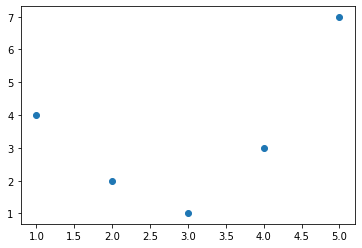

In [10]:
# Derived Features
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,2,3,4,5])
y=np.array([4,2,1,3,7])
plt.scatter(x,y)

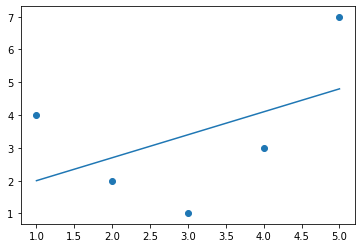

In [11]:
# fit a line to the data using LinearRegression and get the optimal result
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [12]:
# adding extra columns of features to drive more flexibility in the model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


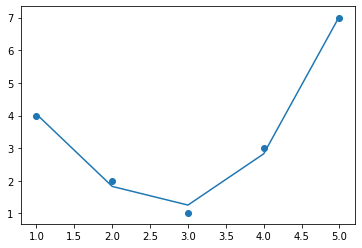

In [13]:
#  Computing a linear regression on this expanded input gives a much closer fit to our data
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

In [14]:
# Image Features
# develop a simple face detection pipeline

#feature engineering image :Application --> a face detection pipeline
#This lead on feature extraction method for image dataset
#we use Histogram of Oriented Gradient (HOG) as af eature extraction

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

C:\Users\Ivan\Anaconda3\lib\site-packages\skimage\feature\_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


Text(0.5, 1.0, 'visualization of HOG features')

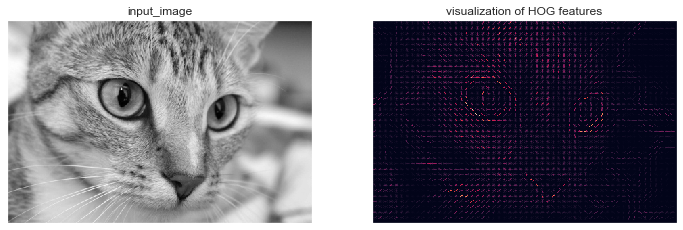

In [15]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualise = True)

fig, ax = plt.subplots(1,2, figsize=(12, 6),
                      subplot_kw=dict(xticks=[],yticks=[]))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('input_image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features')

In [16]:
# HOG in Action : A Simple Face Detector
# Obtain a set of positive training samples
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

RuntimeError: Failed to read the image file C:\Users\Ivan\scikit_learn_data\lfw_home\lfw_funneled\Chris_Reitsma\Chris_Reitsma_0001.jpg, Please make sure that libjpeg is installed

In [ ]:
# Obtain a set of negative training samples 
from skimage import data, transform
img_to_use =['camera', 'text','coins','moon',
            'page','clock','immunohistochemistry',
            'chelsea','coffee','hubble_deep_field']
images =[color.rgb2gray(getattr(data,name)())
        for name in img_to_use]

In [ ]:
from sklearn.feature_extraction.image import PatchExtractor
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                           for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

In [ ]:
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

In [ ]:
# Combine sets and extract HOG features 
from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,
                                    negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [ ]:
X_train.shape

In [ ]:
# Training a support vector machine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

cross_val_score(GaussianNB(), X_train, y_train)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
model = grid.best_estimator_
model.fit(X_train, y_train)

In [ ]:
# Find faces in a new image
test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160, 40:180]

plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [ ]:
# create a window that iterates over patches of this image, and compute HOG features for each patch
def sliding_window(img, patch_size=positive_patches[0].shape,
                   istep=2, jstep= 2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = trasnform.resize(patch, patch_size)
            yield (i, j), patch
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

In [ ]:
labels = model.predict(patches_hog)
labels.sum()

In [ ]:
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))

In [ ]:
# Feature Pipelines
from sklearn.preprocessing import Imputer

model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [ ]:
model.fit(X, y) # X with missing values, from above
print(y)
print(model.predict(X))

In [ ]:
# Principal Component Analysis 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
# Generate the 200 points
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [ ]:
# one quantifies this relationship by finding a list of the principal axes in the data and using those axes to describe the data set
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

In [ ]:
print(pca.components_)

In [ ]:
print(pca.explained_variance_)

In [ ]:
# visualize them as vectors over the input data using the “component” to define the direction of the vector and the “explained variance” to define the squared-length of the vector.
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [ ]:
# PCA as dimensionality reduction
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

In [ ]:
# perform the inverse transform of this reduced data and plot it along with the original data.
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [ ]:
# Choosing the number of component 
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

In [ ]:
# Calculating the cumulative explained variance ratio
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
# PCA as Noise Filtering 
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
    plot_digits(digits.data)

In [ ]:
#  add some random noise to create a noisy dataset
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [ ]:
#  Let’s train a PCA on the noisy data
pca = PCA(0.50).fit(noisy)
pca.n_components_

In [ ]:
# compute these components and then use the inverse of the transform to reconstruct the filtered digits
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)